In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
sns.set_style("whitegrid")


In [5]:
try:
    df_train = pd.read_csv("../data/train.csv")
    print("Dataset loaded successfully.")

except FileNotFoundError:
    print("Error: train.csv not found. Make sure it's in the data folder.")

Dataset loaded successfully.


In [11]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


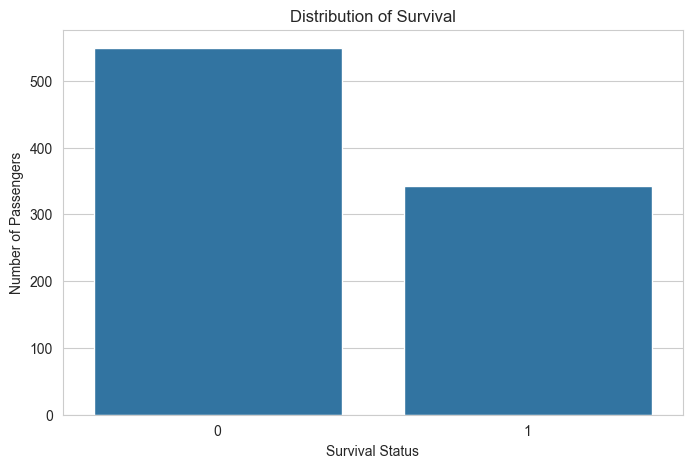

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [32]:
plt.figure(figsize=(8,5))
sns.countplot(x='Survived', data =df_train)
plt.title("Distribution of Survival")
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')
plt.show()

#Print the exact numbers
print(df_train['Survived'].value_counts(normalize=True))

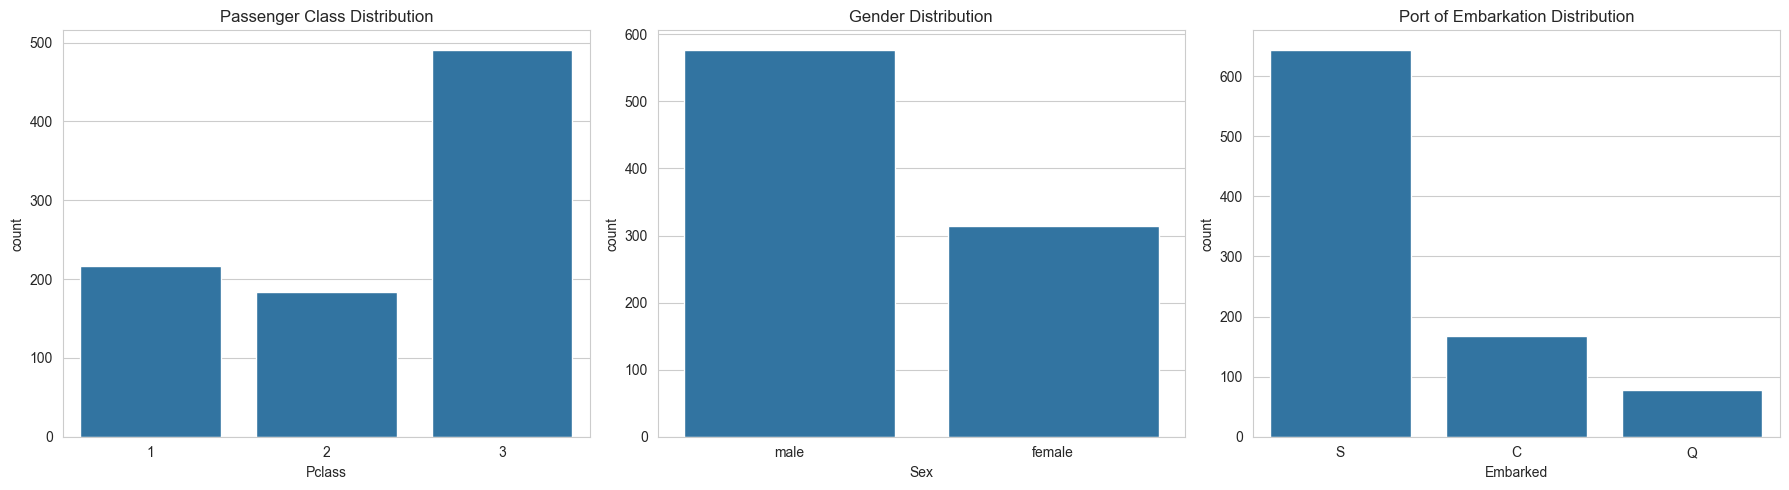

In [38]:
fig, axes =plt.subplots(1,3, figsize=(18,5))

sns.countplot(x='Pclass', data =df_train, ax=axes[0])
axes[0].set_title('Passenger Class Distribution')

sns.countplot(x='Sex', data =df_train, ax=axes[1])
axes[1].set_title('Gender Distribution')

sns.countplot(x='Embarked', data = df_train, ax=axes[2])
axes[2].set_title('Port of Embarkation Distribution')

plt.tight_layout()
plt.show()

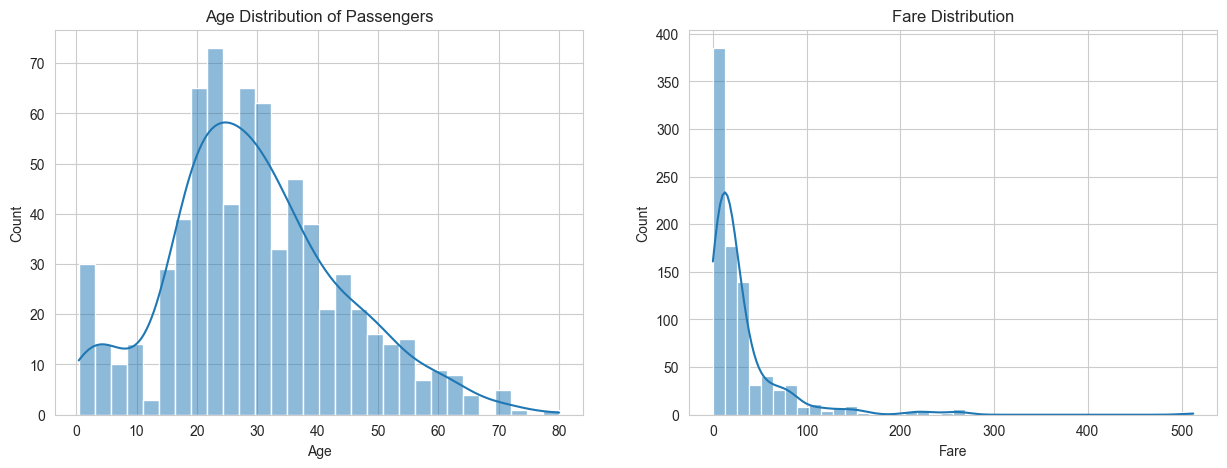

In [55]:
#Create a figure with 2 subplots
fig, axes = plt.subplots(1,2, figsize= (15, 5))

# Plot histogram for Age
sns.histplot(df_train['Age'].dropna(), bins=30, kde= True, ax = axes[0])
axes[0].set_title("Age Distribution of Passengers")

# Plot histogram for Fare
sns.histplot(df_train['Fare'], bins=40, kde=True, ax=axes[1])
axes[1].set_title('Fare Distribution')
plt.show()


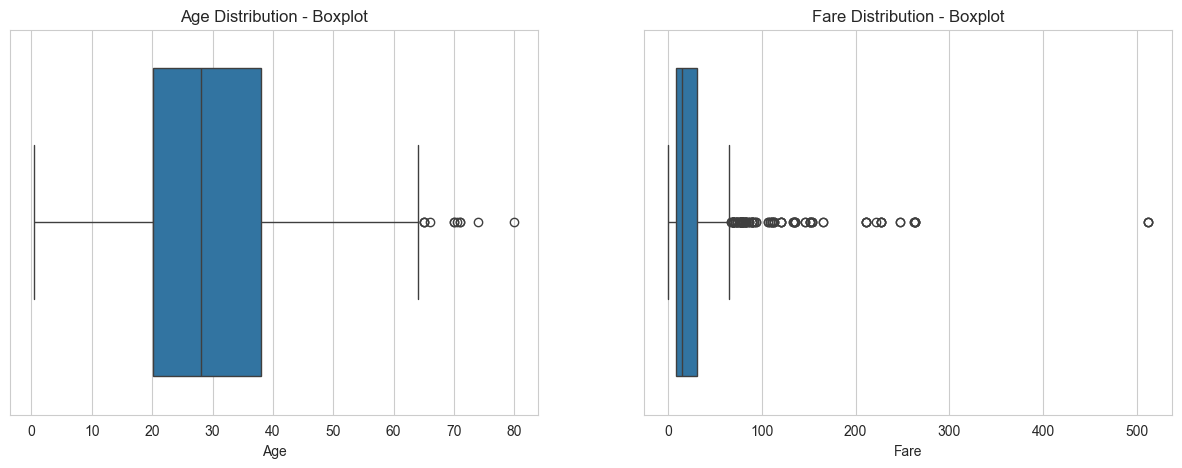

In [60]:
# Create a figure with 2 subplots for boxplots
fig, axes = plt.subplots(1,2, figsize=(15,5))

# Boxplot for Age
sns.boxplot(x=df_train['Age'], ax= axes[0])
axes[0].set_title("Age Distribution - Boxplot")

#Boxplot for Fare
sns.boxplot(x=df_train['Fare'], ax= axes[1])
axes[1].set_title("Fare Distribution - Boxplot")
plt.show()



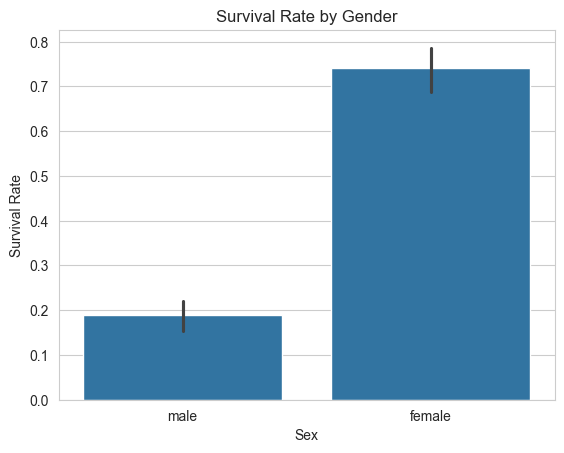

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [63]:
sns.barplot(x='Sex', y = 'Survived', data= df_train)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

#Print the exact numbers
print(df_train.groupby('Sex')['Survived'].mean())

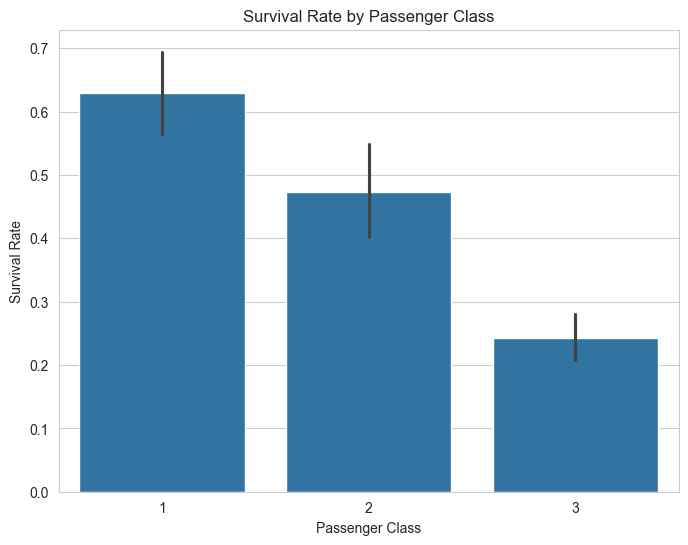

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [64]:
# Bar plot of survival rate by Pclass
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df_train)

plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

plt.show()

# Print the exact numbers for confirmation
print(df_train.groupby('Pclass')['Survived'].mean())

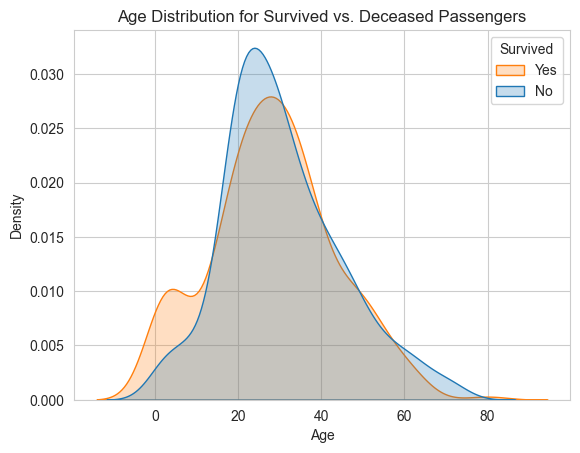

In [65]:
# KDE plot of Age, split by Survival status

sns.kdeplot(data=df_train, x='Age', hue='Survived', fill=True, common_norm=False)
plt.title('Age Distribution for Survived vs. Deceased Passengers')
plt.legend(title='Survived', labels=['Yes', 'No'])
plt.show()

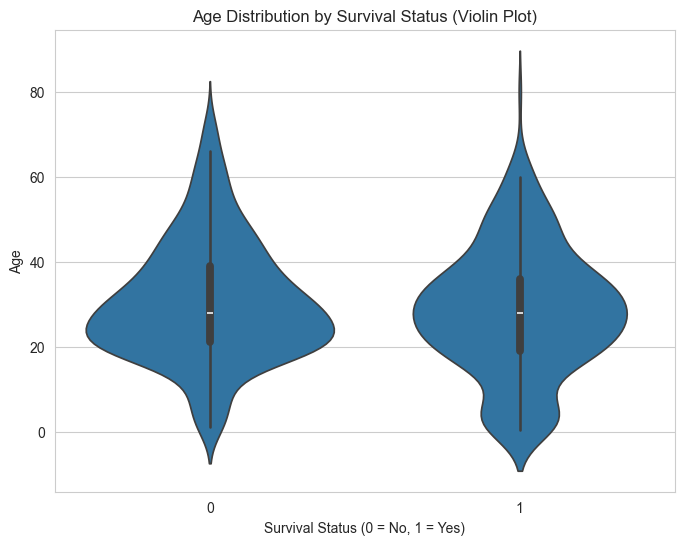

In [66]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Survived', y='Age', data=df_train)

plt.title('Age Distribution by Survival Status (Violin Plot)')
plt.xlabel('Survival Status (0 = No, 1 = Yes)')
plt.ylabel('Age')

plt.show()

